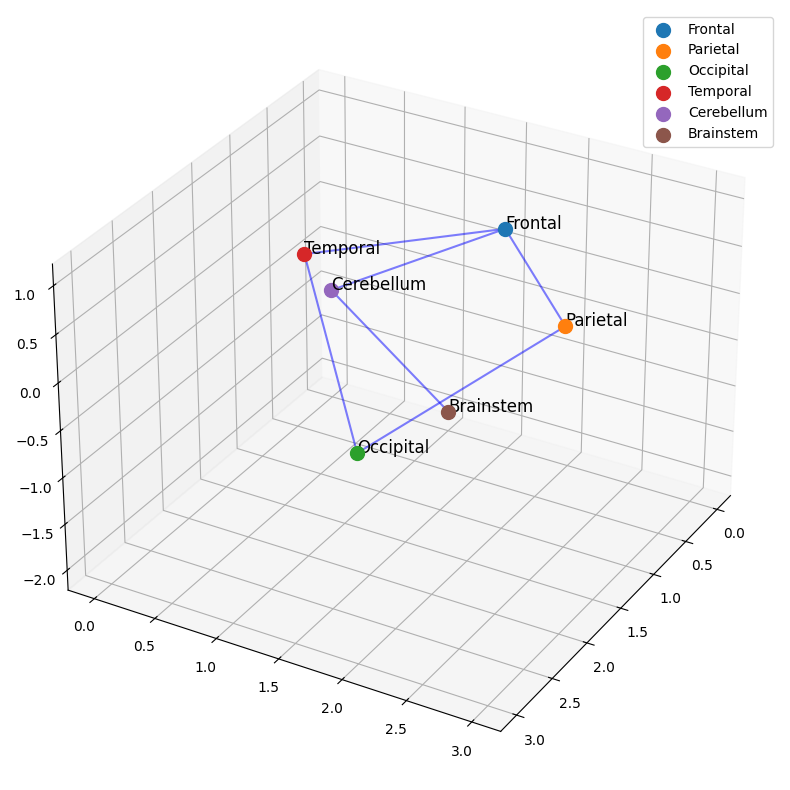

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define a simple brain regions graph
regions = ["Frontal", "Parietal", "Occipital", "Temporal", "Cerebellum", "Brainstem"]
connections = [
    ("Frontal", "Parietal"),
    ("Frontal", "Temporal"),
    ("Temporal", "Occipital"),
    ("Occipital", "Parietal"),
    ("Cerebellum", "Brainstem"),
    ("Frontal", "Cerebellum")
]

# Create a network graph
G = nx.Graph()
G.add_nodes_from(regions)
G.add_edges_from(connections)

# Define 3D positions for each region (for illustrative purposes)
# Normally, we could use actual 3D coordinates, but let's make a simple layout.
positions = {
    "Frontal": (1, 2, 1),
    "Parietal": (2, 3, 1),
    "Occipital": (3, 2, 0),
    "Temporal": (2, 1, 1),
    "Cerebellum": (0, 0, -1),
    "Brainstem": (0, 1, -2)
}

# Set up a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Draw the network in 3D space
edges = G.edges()
for edge in edges:
    x_vals = np.array([positions[edge[0]][0], positions[edge[1]][0]])
    y_vals = np.array([positions[edge[0]][1], positions[edge[1]][1]])
    z_vals = np.array([positions[edge[0]][2], positions[edge[1]][2]])
    ax.plot(x_vals, y_vals, z_vals, color='b', alpha=0.5)

# Plot the nodes (brain regions)
for region in regions:
    ax.scatter(*positions[region], s=100, label=region)

# Annotate nodes with the region names
for region, pos in positions.items():
    ax.text(pos[0], pos[1], pos[2], region, fontsize=12)

# Adjust the view angle
ax.view_init(elev=30, azim=30)

# Display the plot
plt.legend()
plt.show()
